# Stock Prediction Using LSTM 

In [1]:
# Importing the necessary libraries

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter("ignore")

### Exploratory Data Analysis

In [2]:
df = pd.read_csv(r"C:\Users\user1\OneDrive\Documents\Corizo data science\stock_price_dataset.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


Text(0, 0.5, 'Price')

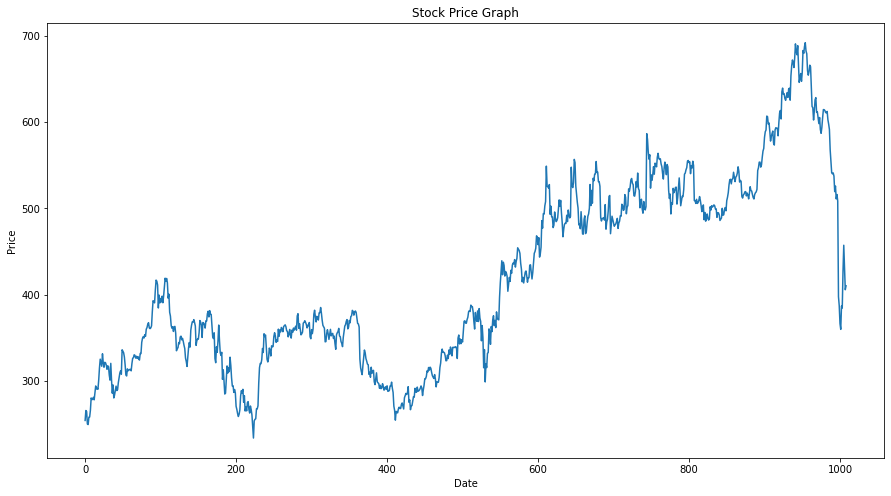

In [5]:
plt.figure(figsize=(15,8))
plt.title("Stock Price Graph")
plt.plot(df["Close"])
plt.xlabel("Date")
plt.ylabel("Price")

### Preparation of Training Set

In [6]:
taken_col = df["Close"]
values = taken_col.values
train_col_len = math.ceil(len(values)*0.8)
print(train_col_len)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))

train_data = scaled_data[0:train_col_len,:]

X_train = []
y_train = []

for i in range(60,len(train_data)):
    X_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    
X_train,y_train = np.array(X_train),np.array(y_train)

X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))
print("X_train:",np.shape(X_train))
print("y_train:",np.shape(y_train))

808
X_train: (748, 60, 1)
y_train: (748,)


### Preparation of Test Set

In [7]:
test_data = scaled_data[train_col_len-60:,:]
X_test = []
Y_test = values[train_col_len:]

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i,0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
print("X_test:",np.shape(X_test))
print("Y_test:",np.shape(Y_test))

X_test: (201, 60, 1)
Y_test: (201,)


### Building the LSTM Model

In [8]:
model = keras.Sequential()
model.add(layers.LSTM(100,return_sequences = True,input_shape = (X_train.shape[1],1)))
model.add(layers.LSTM(100,return_sequences = False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


### Training the Model

In [15]:
model.compile(optimizer = "adam", loss = "mean_squared_error")
#model.fit(X_train,y_train,epochs = 3,batch_size = 1)
model.fit(X_train,y_train,epochs = 5)

Epoch 1/5
24/24 [==============================] - 8s 88ms/step - loss: 7.0370e-04
Epoch 2/5
24/24 [==============================] - 2s 88ms/step - loss: 6.4541e-04
Epoch 3/5
24/24 [==============================] - 2s 88ms/step - loss: 6.2246e-04
Epoch 4/5
24/24 [==============================] - 2s 86ms/step - loss: 5.9344e-04
Epoch 5/5
24/24 [==============================] - 2s 89ms/step - loss: 6.8451e-04


### Evaluating the Model

In [16]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - Y_test)**2)
print("rmse:",rmse)

7/7 [==============================] - 1s 28ms/step
rmse: 2.184407378138606


### Visualizing the Predicted Prices 

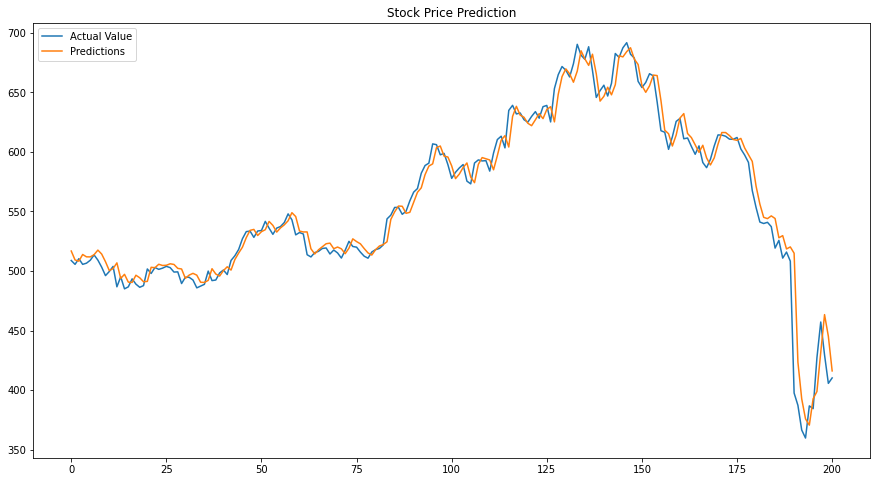

In [17]:
plt.figure(figsize=(15,8))
plt.title("Stock Price Prediction")
plt.plot(Y_test)
plt.plot(predictions)
plt.legend(["Actual Value","Predictions"],loc = "upper left")
plt.show()